In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pickle

In [7]:
df=pd.read_csv('/config/workspace/Dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0, df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0, df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0, df['BMI'].mean())

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

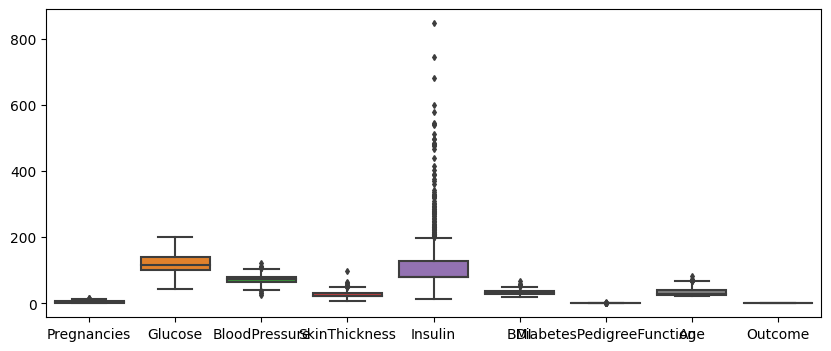

In [12]:
fig, axis= plt.subplots(figsize=(10,4))
sns.boxplot(data=df, ax=axis, fliersize=3)

In [13]:
## segregate of dependent and independent variable in from dataset

In [14]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [15]:
## spliting the dataset in test and train.

In [16]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.22, random_state=42)

In [17]:
x_train.shape, x_test.shape, y_train.shape, y_train.shape

((599, 8), (169, 8), (599,), (599,))

In [18]:
def standard_scaling(x_train, x_test):
    obj_std_scale=StandardScaler()
    x_train_scale=obj_std_scale.fit_transform(x_train)
    x_test_scale=obj_std_scale.transform(x_test)

    file=open('/config/workspace/Model/StandardScaler.pkl','wb')
    pickle.dump(obj_std_scale, file)
    file.close()
    
    return  x_train_scale,x_test_scale

In [19]:
 x_train_scale,x_test_scale=standard_scaling(x_train, x_test)

In [20]:
len(x_train_scale)

599

In [21]:
len(x_test_scale)

169

In [22]:
len(y_train)

599

In [23]:
obj_lin=LogisticRegression()

In [24]:
obj_lin.fit(x_train_scale, y_train)

LogisticRegression()

In [25]:
obj_lin.predict(x_test_scale)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [26]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
377    0
235    1
158    0
69     0
260    0
Name: Outcome, Length: 169, dtype: int64

## hypermeter Tuning

In [27]:
parameter= {'penalty':['l1','l2','elasticnet', None],
            'C': np.logspace(-3,3,7),
            'solver'  : ['newton-cg', 'lbfgs', 'liblinear']
           }

In [28]:
clf=GridSearchCV(obj_lin, 
             param_grid=parameter,
             scoring='accuracy',
             cv=10)

In [29]:
clf.fit(x_train_scale, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [30]:
clf.best_params_

{'C': 0.001, 'penalty': None, 'solver': 'newton-cg'}

In [31]:
clf.best_score_

0.7662994350282485

In [32]:
y_predict=clf.predict(x_test_scale)

In [33]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [34]:
print(confusion_matrix(y_test, y_predict))
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[91 18]
 [22 38]]
0.7633136094674556
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       109
           1       0.68      0.63      0.66        60

    accuracy                           0.76       169
   macro avg       0.74      0.73      0.74       169
weighted avg       0.76      0.76      0.76       169



In [35]:
file=open('/config/workspace/Model/Model_for_predication.pkl', 'wb')
pickle.dump(obj_lin, file)
file.close()

In [36]:
from sklearn.preprocessing import StandardScaler
import pickle
std = pickle.load(open("/config/workspace/Model/StandardScaler.pkl","rb"))

In [42]:
std.transform(x_test)

array([[ 0.67650698, -0.7899787 , -1.17605186, ...,  0.23386434,
        -0.11993619,  0.87902707],
       [-0.5286311 , -0.32290258,  0.22801501, ...,  0.47943836,
        -0.95403313, -1.0439176 ],
       [-0.5286311 , -0.4563529 , -0.68049885, ..., -0.22839263,
        -0.92445522, -1.0439176 ],
       ...,
       [-0.5286311 , -1.1236045 ,  0.14542284, ..., -0.48841218,
        -0.71445209, -0.95651103],
       [ 0.07393794,  0.81142514,  1.0539367 , ..., -0.50285771,
        -0.83276371, -0.51947815],
       [-0.22734658,  2.31274124, -0.35013017, ..., -0.2139471 ,
        -0.50740675,  0.09236788]])

In [43]:
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object